In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Create nodes dataframe

In [2]:
# Load data with format (node INDEX: IPv6 INTERFACES)
data = pd.read_csv('speedtrap.nodes.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX: IPv6 INTERFACES
data['nodes'] = data.nodes.str[5:]

# INDEX | IPv6 INTERFACES
data['index'], data['ipv6'] = data.nodes.str.split(':',1).str

# Convert IPv6 interfaces from string to list
data['ipv6'] = data['ipv6'].str[2:-1]
data['ipv6'] = data['ipv6'].apply(lambda x: x.split(' '))

nodes = data[['index', 'ipv6']]
nodes = nodes.set_index('index')

In [3]:
nodes.head(10)

,ipv6
index,
N1,"[2a01:8840:1d::1, 2a01:8840:d1::1, 2a01:8840:5..."
N2,"[2a02:768:0:3330::3330, 2a02:768:0:3315::3315,..."
N3,"[2001:470:0:2b5::1, 2001:470:0:3aa::1, 2001:47..."
N4,"[2001:470:0:349::1, 2001:7f8:43::6939:1, 2001:..."
N5,"[2404:8000:1745:1::b9, 2404:8000:0:ff::39, 240..."
N6,"[2001:470:17:38::1, 2001:470:17:68::1, 2001:47..."
N7,"[2001:470:1:52f::1, 2001:470:1:5e7::1, 2001:47..."
N8,"[2001:7f8:1::a500:6939:1, 2001:470:0:22f::1, 2..."
N9,"[2001:2000:3080:a0b::2, 2001:2000:3080:a0a::2,..."


## Create links dataframe

In [4]:
# Load data with format (link INDEX: SOURCE:IPv6 DESTINATIONS) or (link INDEX: SOURCE DESTINATIONS)
data = pd.read_csv('speedtrap.links.txt',delimiter='\n', comment='#', header=None, names=['links'])

## Case 1: (link INDEX: SOURCE:IPv6 DESTINATIONS)

# INDEX: SOURCE:IPv6 DESTINATIONS
data['links'] = data.links.str[5:]

# INDEX | SOURCE:IPv6 DESTINATIONS
data['index'], data['links'] = data['links'].str.split(':',1).str

# INDEX | SOURCE | IPv6 DESTINATIONS 
data['source_node'], data['source_ipv6'] = data['links'].str.split(':',1).str

# Remove useless spaces
data['source_node'] = data['source_node'].str[2:]

# INDEX | SOURCE | IPv6 | DESTINATIONS 
data['source_ipv6'], data['dest_nodes'] = data['source_ipv6'].str.split(' ',1).str

## Case 2: (link INDEX: SOURCE DESTINATIONS)

# INDEX | SOURCE | DESTINATIONS
data['source_n'], data['dest_n'] = data[data['source_ipv6'].isna()]['source_node'].str.split(' ', 1).str

# Merge Case 1 and Case 2
data['dest_nodes'] = data['dest_nodes'].fillna(data['dest_n'])
data.loc[data['source_ipv6'].isna(),'source_node'] = data['source_n']

# Convert destination nodes from string to list
data['dest_nodes'] = data['dest_nodes'].str[:-1]
data['dest_nodes'] = data['dest_nodes'].apply(lambda x: x.split(' '))

links = data[['index', 'source_node', 'source_ipv6', 'dest_nodes']]
links = links.set_index('index')

In [5]:
links.head(10)

,source_node,source_ipv6,dest_nodes
index,,,
L1,N6489,::62.38.37.82,"[N6482, N6483, N6484, N6485, N6486, N6487, N6488]"
L2,N434665,::62.38.96.153,[N6489]
L3,N471838,::62.38.96.158,[N6489]
L4,N507980,::62.38.96.166,[N6489]
L5,N470679,::62.38.96.170,[N6489]
L6,N625907,::62.38.96.174,"[N6490, N6489]"
L7,N493271,::62.38.96.193,[N6489]
L8,N165904,::ff80:a73:62e,"[N6491, N6492]"
L9,N166597,::ff80:a73:63f,[N6493]


In [6]:
links.tail(10)

,source_node,source_ipv6,dest_nodes
index,,,
L2994361,N385984,NaN,[N1938511]
L2994362,N897,NaN,[N2917197]
L2994363,N1408,NaN,[N2917197]
L2994364,N937,NaN,[N2917197]
L2994365,N1518,NaN,[N2917197]
L2994366,N3282,NaN,[N2917198]
L2994367,N364235,NaN,[N1925874]
L2994368,N364227,NaN,[N1926221]
L2994369,N1684738,NaN,[N1925299]


## Add AS number to nodes

In [7]:
# Load data with format (node.AS INDEX AS TYPE)
data = pd.read_csv('speedtrap.nodes.as.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX AS TYPE
data['nodes'] = data.nodes.apply(lambda x: x[8:])

# INDEX | AS
data['node_index'], data['AS_number'], _ = data.nodes.str.split(' ',2).str

nodes_as = data[['node_index','AS_number']]
nodes_as = nodes_as.set_index(['node_index'])

In [8]:
# Add AS column to nodes dataframe
nodes = nodes.join(nodes_as)

In [9]:
nodes.head(10)

,ipv6,AS_number
index,,
N1,"[2a01:8840:1d::1, 2a01:8840:d1::1, 2a01:8840:5...",42
N2,"[2a02:768:0:3330::3330, 2a02:768:0:3315::3315,...",44489
N3,"[2001:470:0:2b5::1, 2001:470:0:3aa::1, 2001:47...",51531
N4,"[2001:470:0:349::1, 2001:7f8:43::6939:1, 2001:...",6939
N5,"[2404:8000:1745:1::b9, 2404:8000:0:ff::39, 240...",17451
N6,"[2001:470:17:38::1, 2001:470:17:68::1, 2001:47...",6939
N7,"[2001:470:1:52f::1, 2001:470:1:5e7::1, 2001:47...",6939
N8,"[2001:7f8:1::a500:6939:1, 2001:470:0:22f::1, 2...",1200
N9,"[2001:2000:3080:a0b::2, 2001:2000:3080:a0a::2,...",12189


## Add geo data to nodes

In [10]:
# Load data with format (node.geo INDEX: COUNTRY LATITUDE LONGITUDE)
data = pd.read_csv('speedtrap.nodes.geo.txt',delimiter='\n', comment='#', header=None, names=['nodes'])

# INDEX: COUNTRY LATITUDE LONGITUDE
data['nodes'] = data.nodes.str[9:-1]

# INDEX: | COUNTRY | LATITUDE | LONGITUDE
data['node_index'], data['country'], data['latitude'], data['longitude'] = data.nodes.str.split('\t').str

# INDEX | COUNTRY | LATITUDE | LONGITUDE
data['node_index'] = data['node_index'].str[:-1]

geo = data[['node_index','country','latitude','longitude']]
geo = geo.set_index('node_index')

In [11]:
nodes = nodes.join(geo)

In [12]:
nodes.head(10)

,ipv6,AS_number,country,latitude,longitude
index,,,,,
N1,"[2a01:8840:1d::1, 2a01:8840:d1::1, 2a01:8840:5...",42,IE,53.0000,-8.000
N2,"[2a02:768:0:3330::3330, 2a02:768:0:3315::3315,...",44489,CZ,49.7500,15.500
N3,"[2001:470:0:2b5::1, 2001:470:0:3aa::1, 2001:47...",51531,US,37.7510,-97.822
N4,"[2001:470:0:349::1, 2001:7f8:43::6939:1, 2001:...",6939,US,37.7510,-97.822
N5,"[2404:8000:1745:1::b9, 2404:8000:0:ff::39, 240...",17451,ID,-5.0000,120.000
N6,"[2001:470:17:38::1, 2001:470:17:68::1, 2001:47...",6939,US,37.7510,-97.822
N7,"[2001:470:1:52f::1, 2001:470:1:5e7::1, 2001:47...",6939,US,37.7510,-97.822
N8,"[2001:7f8:1::a500:6939:1, 2001:470:0:22f::1, 2...",1200,US,37.7510,-97.822
N9,"[2001:2000:3080:a0b::2, 2001:2000:3080:a0a::2,...",12189,US,37.7510,-97.822


## Observations

In [13]:
print('Number of nodes : {}'.format(len(nodes)))
print('Number of nodes without AS : {}'.format(len(nodes[nodes['AS_number'].isna()])))
print('Number of nodes without geo data : {}'.format(len(nodes[nodes['country'].isna()])))

Number of nodes : 2917198
Number of nodes without AS : 752947
Number of nodes without geo data : 1020115


In [14]:
temp = nodes['ipv6'].apply(lambda x: len(x))
temp.describe().apply(lambda x: format(x, 'f'))

count    2917198.000000
mean           1.003709
std            0.114075
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max           55.000000
Name: ipv6, dtype: object

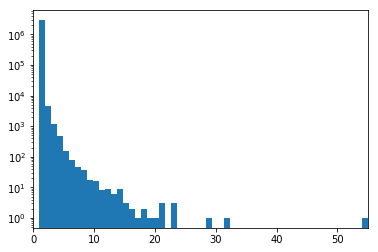

In [15]:
plt.hist(temp, bins = temp.max())
plt.xlim(0,temp.max())
plt.yscale('log')

Careful, the y-axis is in log scale. This shows that a majority of nodes has only one interface

In [16]:
print('Number of links : {}'.format(len(links)))
print('Number of links with a single interface source : {}'.format(len(links[links['source_ipv6'].isna()])))

Number of links : 2994370
Number of links with a single interface source : 1062869


In [17]:
temp = links['dest_nodes'].apply(lambda x: len(x))
temp.describe().apply(lambda x: format(x, 'f'))

count    2994370.000000
mean           1.189682
std            2.273788
min            1.000000
25%            1.000000
50%            1.000000
75%            1.000000
max          376.000000
Name: dest_nodes, dtype: object

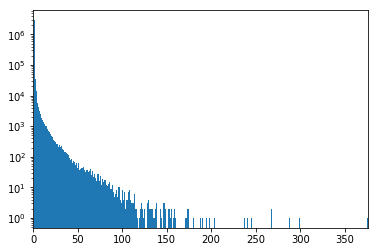

In [18]:
plt.hist(temp, bins = temp.max())
plt.xlim(0,temp.max())
plt.yscale('log')

Careful, the y-axis is in log scale. This shows that a majority of nodes has only one destination. We can also notice that a few number of nodes have a large amount of destinations. (Certainly routers in Tier-1 network)